<a href="https://colab.research.google.com/github/Lotfullah21/Deep_Learning_MIT-Press/blob/main/Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artifical Neural Network
in the begining the Anns were thought to work same as brain, that is where the name come from, but in reality it has less to do with brain, even though research is going to make computers to mimic the brain.
but in reality, it is just a mapping function, where it consists of many components like, Input units, Hidden layer, and output layer.



## Input Layer
a layer is where we have bunhch of neurons parallel to each other, this layer can be consisit of one or multiple inputs, an input is also known as a unit in ANNs.
thses units are the primary source of information.


## Hidden Layer
it is the layer between the input and output units,it is where the magic happens, adding non_linearity to our function to map the complex function.

in theorems of general approximation , we are having that a model with a single hidden layer can generalize any kind of function.
more number of hidden units means we can extract more and complex features.
But keeping in mind that more number of units are layers does not help us in getting what we want, they should be carfeully choosen.


# Output Layer
in this layer , after doing certain calculation in hidden layers we output what we have learned and compares it with our desired output.
the number of output units depend on the model we want to build, for example for binary outputs, we have 2 units, for multiclass models, we are having more than one or two units.

## Network 
a network is consist of many layers, network is also called as model
a model maps the inputs to the outputs by learning meaninful features and representation such that the difference between what the model is givining with what we want should be minimum.


## Loss Function 
this is difference between the model output and its true output(desired feature), we want to minimize this function during training. this says how happy or unhappy we are with our model performance.


## Optimizer
it is a technique which determines how we are going to update our weights based on the loss function.

in this notebook we will use **Keras**, it is a model-level library, providing high-level building blocks for developing deep-learning models.
it does not handle low level operations such as tensor manipulation and differentiation. instead, it relies on a specialized, well optimized tensor library to do so, serving as the backend engine for keras.
Tensorflow is one of those library backends

## Building the model
it is a movie recommendation system,wheter the customer liked it or not, and we decide that based on the text content of the reviews.


In [1]:
from keras.datasets import imdb
(train_data, train_labels),(test_data,test_lables) = imdb.load_data(num_words = 15000)

17473536/17464789 [==============================] - 0s 0us/step


train_data and test_data are the reviews which endcoded into integers
and the their labels are either 0 or 1, negative and positive respectively.
num_words = 15000 means that we keep 15000 most frequently used words and discard the ones which happened to be used lesser.

In [2]:
train_data[0]
train_labels[0]

1

In [3]:
# train_data[0:10]

In [4]:
max([max(sequence) for sequence in train_data])

14999

In [5]:
# lets decode one review back to words
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decode_review  = " ".join(
    [reverse_word_index.get(i-3,'?') for i in train_data[2]])


1654784/1641221 [==============================] - 0s 0us/step


In [6]:
decode_review[:]

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

For neural networks, the data should be in the form of tensors. 
and of the techniques to convert intgers into tensors is by using one-hot encoding, which turns all indices into zeros excet the ones which we are feeding.

In [7]:
import numpy as np
def vectorize_sequences(sequences,dimension=15000):
  result = np.zeros((len(sequences),dimension))
  for i , sequence in enumerate(sequences):
    # set specific indices of results[i] to 1s
    result[i,sequence] = 1
  return result
# vectorize the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorize the labels too
y_train = np.asarray(train_labels).astype('float32')

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_lables).astype('float32')

## Building the model
Here, our inputs are in vector form and outputs are a single number(0 or 1)


In [10]:
from keras import models
from keras import layers

In [11]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(15000,) ))
model.add(layers.Dense(16,activation ='relu'))
model.add(layers.Dense(1,activation="sigmoid"))

## Compiling the model
in this step we need to do two things, one is adding the ***loss*** function to measures how our output and the true outputs deviate and the 2nd one is adding an **optimizer** to use the loss and make adjustments based on the, by adjustments we mean chaging the learnable parameters such that make our model output closer to the true output.

We have different way of measuring the loss function, in this model as we are having binary output, the ***'binary-crossentropy*'** is the most common one to use, it measures the distance between the true distribution and our model output.

and ***RMSProp*** is one of the adaptive learning algorithm which helps us to reach to the optimial point, it uses the past history data to converge faster but in different way, in Adagrad we use the whole past history data to decide for the next move, but RMSProp do not consider the data which are from extremelp past, so that to converge faster once it finds the convex bowl.

In [12]:
model.compile(optimizer = "rmsprop", 
              loss = "BinaryCrossentropy",
              metrics = ['accuracy'])

## Validation 
Our main objective in building a model is to get the best result while facing a new input, if our model is doing good (here we measuring it with accuracy) only on training data, it means it is just memorizing the labels which has been given to them during training, to check how good our model will do while seeing a new input, we will keep soem of the data to test the model. it is knwon is validation set. 

Once we observe that the validaiton accuracy is decreasing and training accuract going at that we will stop the training, it is one of the regualarization techniques which is called early stopping, we go throgh this later.

In [13]:
x_validation = x_train[:15000]
x_new_train_data = x_train[15000:]
y_validation = y_train[:15000]
y_new_train_labels = y_train[15000:]

**batch_size** means for how many samples you are going to correct them each time you go through, usually choose the batch size = 2^N, N can be any number.

**epochs** means how many times we are going to check and correct the errors.

In [14]:
History = model.fit(x_new_train_data,y_new_train_labels,epochs = 15, batch_size = 256, validation_data = (x_validation,y_validation))

Epoch 1/15
40/40 [==============================] - 6s 56ms/step - loss: 0.5081 - accuracy: 0.7963 - val_loss: 0.3740 - val_accuracy: 0.8768
Epoch 2/15
40/40 [==============================] - 1s 21ms/step - loss: 0.2721 - accuracy: 0.9191 - val_loss: 0.3210 - val_accuracy: 0.8716
Epoch 3/15
40/40 [==============================] - 1s 22ms/step - loss: 0.1783 - accuracy: 0.9471 - val_loss: 0.2811 - val_accuracy: 0.8869
Epoch 4/15
40/40 [==============================] - 1s 22ms/step - loss: 0.1228 - accuracy: 0.9662 - val_loss: 0.3075 - val_accuracy: 0.8795
Epoch 5/15
40/40 [==============================] - 1s 22ms/step - loss: 0.0848 - accuracy: 0.9794 - val_loss: 0.4448 - val_accuracy: 0.8385
Epoch 6/15
40/40 [==============================] - 1s 22ms/step - loss: 0.0596 - accuracy: 0.9871 - val_loss: 0.4520 - val_accuracy: 0.8495
Epoch 7/15
40/40 [==============================] - 1s 22ms/step - loss: 0.0421 - accuracy: 0.9916 - val_loss: 0.4216 - val_accuracy: 0.8636
Epoch 8/15
40

if we look at above calcuations, after 5th epoch, the validation accuracy is decreasing, that is where we have to stop training, because after that the model is learning unwanted patterns and features.

In [15]:

history_dictionary = History.history

In [16]:
history_dictionary.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

by using above keys we can plot these parameters too look closer into them.

In [17]:
from keras.metrics import accuracy
import matplotlib.pyplot as plt
loss_va = history_dictionary['loss']
validation_loss = history_dictionary['val_loss']
accuracy_va = history_dictionary['accuracy']
validation_accuracy = history_dictionary['val_accuracy']
epochs = range(1,len(accuracy_va)+1)



## Plotting training and validation Loss

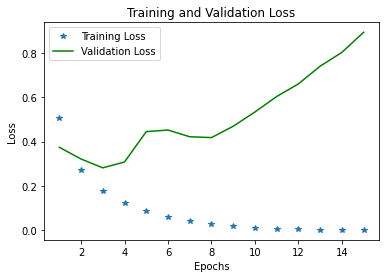

In [18]:
plt.plot(epochs,loss_va,'*',label ="Training Loss")
plt.plot(epochs,validation_loss,c = "green",label ="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Plotting training and validation accuracy

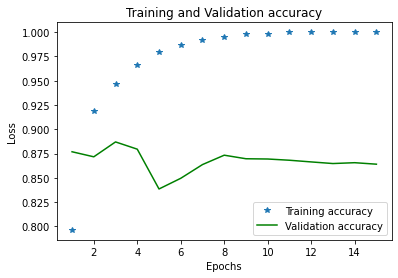

In [19]:
plt.plot(epochs,accuracy_va,'*',label ="Training accuracy")
plt.plot(epochs,validation_accuracy,c = "green",label ="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Checking on Test set?

In [20]:
resulsts = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.9691 - accuracy: 0.8485


## Conclusion
we trained our model on the imdb dataset, by using the loss and optimizers we could compute the loss and find the optimal points and at the end we fit our model where the true learning happens.

we observed both with validation and training data to check performance of our model and we could see that after 5th epoch the validation accuaracy wa going down, by using early stopping regularization we could train only for 5 epochs.

Finally , we plot the validation and training losses and accuriacies against each to be more interpretable.